#멜론 TOP30 노래 정보 시각화

## 1.패키지 설치 및 임포트

In [2]:
!pip install koreanize.matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 11.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from google.colab import files
from collections import Counter
import re

import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import koreanize_matplotlib

## 2.데이터 전처리

In [4]:
df = pd.read_csv('/content/멜론 2003년 TOP30_2_20240710.csv')
df.head()

,노래제목,가수,가사
0,Break Away,빅마마,이젠 날 떠나가줘 이젠 날 다 잊어줘 나를 버리고 살아가줘 가져간 내 사랑을 내게...
1,점점,브라운 아이즈,점점 넌 멀어지나봐웃고 있는 날 봐 때론 며칠씩 편하게 지내점점 널 잊는 것 같아...
2,With Me,휘성 (Realslow),This song is dedicated to all the broken hear...
3,정말 사랑했을까,브라운 아이드 소울,좋았나봐 널 많이 아꼈나봐다시 못견디게 아픈걸 보니가슴에서 자꾸만 열이 나고널 떠...
4,아틀란티스 소녀 (Atlantis Princess),보아 (BoA),저 먼 바다 끝엔 뭐가 있을까다른 무언가 세상과는 먼 얘기구름위로 올라가면 보일까...


In [10]:
# 불용어 리스트
stopwords = ['으로', 'the', 'an', '너를', '내가', '나를', 'you', 'my', '너의', '나의', '니가', '내게', '네게', '네가', '나는', '나도', '너는', '너도']

def remove_stopwords(words):
  return [word for word in words if word not in stopwords and len(word) >= 2]

In [11]:
# 가사에 단어 추출

# 1) 데이터 프레임 불러오기
df = pd.read_csv('/content/멜론 2003년 TOP30_2_20240710.csv')

# 2) 가사 컬럼만 모두 하나의 문자열로 합치기
all_lyrics = ' '.join(df['가사'])

# 3) 단어 추출
# 가사 뭉치에서 단어를 추출하고, 단어의 빈도를 계산
# \b는 word boundary 단어의 시작과 끝에 있는 문자로 매칭
# \w는 word의 약자로 알파벳, 숫자, _ 문자를 찾기 [0-9Aa-Zzㄱ-ㅎ]
words = re.findall(r'\b\w+\b', all_lyrics.lower())

# 4) 불용어 처리
words = remove_stopwords(words)

## 3.단어의 빈도표 만들기

In [12]:
# 단어의 빈도가 가장 높은 상위 20개 단어의 수를 추출
word_freq = Counter(words)
word_freq


top_words = [word for word, freq in word_freq.most_common(20)]
top_freqs = [freq for word, freq in word_freq.most_common(20)]

## 4.시각화

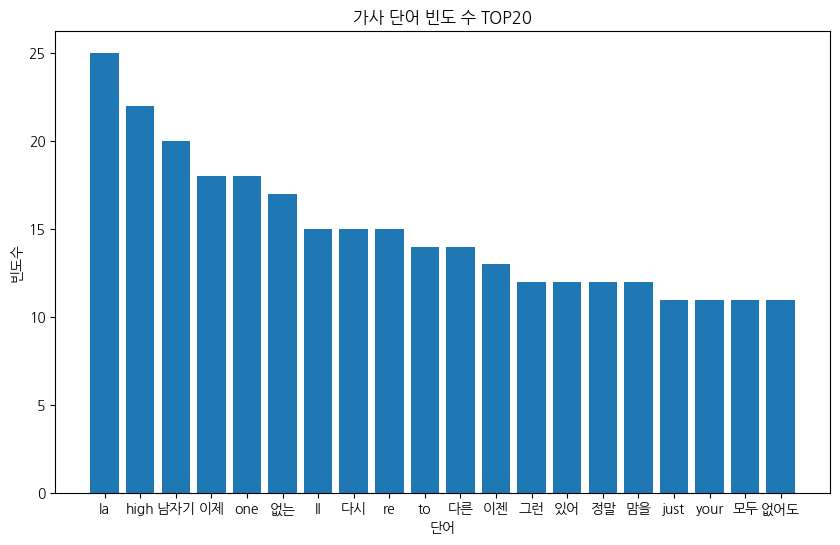

In [13]:
# 막대그래프 시각화
plt.figure(figsize=(10,6))
plt.bar(top_words, top_freqs)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('가사 단어 빈도 수 TOP20')
plt.show()

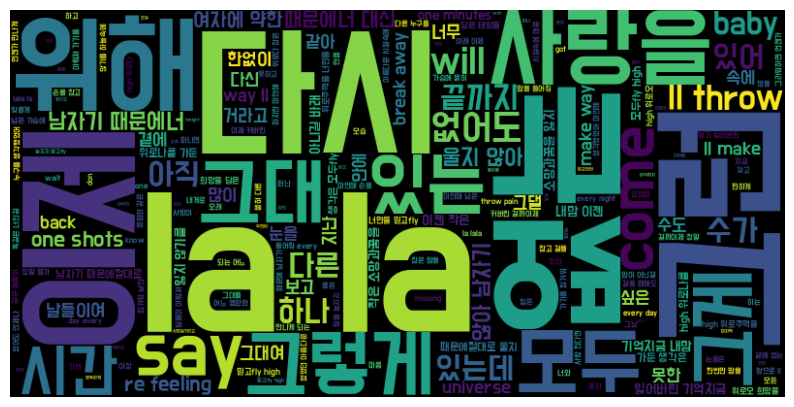

In [14]:
# 워드 클라우드 시각화
wc = WordCloud(width=800, height=400, font_path='/content/BMDOHYEON_ttf.ttf').generate(' '.join(words))
plt.figure(figsize=(10,6))

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

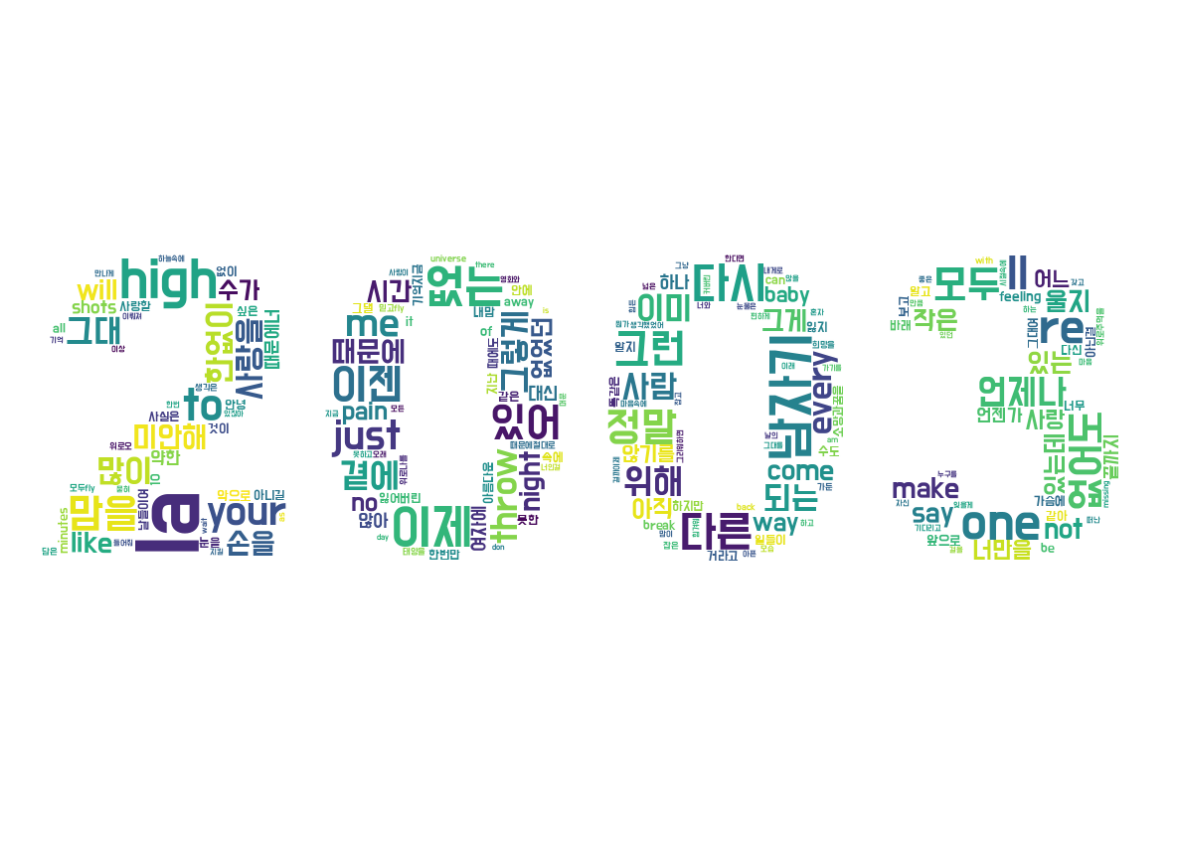

In [16]:
font_path = '/content/BMDOHYEON_ttf.ttf'
icon = Image.open('/content/2003.jpg')
mask = np.array(icon)

wc = WordCloud(width=1000, height=700, background_color='white', font_path=font_path, mask=mask, colormap='viridis').generate_from_frequencies(word_freq)

plt.subplots(figsize=(15,15))
plt.axis('off')

# mask 이미지의 색상을 기준으로 워드 클라우드 색상 적용
#img_colors = ImageColorGenerator(mask)
#wc = wc.recolor(color_func=img_colors)

plt.imshow(wc, interpolation='bilinear')
plt.show()